### Plotted percentiles of cin and differences in two epochs

In [2]:
#importing all the necessary packages
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
import xarray
import netCDF4
import pandas as pd
from datetime import datetime, timedelta
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import colors
import matplotlib
from mpl_toolkits.basemap import Basemap
from scipy.stats import linregress


In [3]:
dir="../CINE/"
ds = xarray.open_mfdataset([dir+'60.nc',dir+'70.nc',dir+'80.nc',dir+'90.nc',dir+'00.nc',dir+'10.nc'])
ds=ds.sel(latitude=slice('30','26'),longitude=slice('94','98'))
x1=ds.cin

In [56]:
test1=ds.cin[:,:,:]
test1

<xarray.DataArray 'cin' (time: 525960, latitude: 16, longitude: 16)>
dask.array<getitem, shape=(525960, 16, 16), dtype=float32, chunksize=(87672, 16, 16), chunktype=numpy.ndarray>
Coordinates:
  * longitude  (longitude) float32 94.0 94.25 94.5 94.75 ... 97.25 97.5 97.75
  * latitude   (latitude) float32 29.75 29.5 29.25 29.0 ... 26.5 26.25 26.0
  * time       (time) datetime64[ns] 1960-01-01 ... 2019-12-31T23:00:00
Attributes:
    units:      J kg**-1
    long_name:  Convective inhibition

In [72]:
threshold1 = np.nanpercentile(x1, 2)
threshold2 = np.nanpercentile(x1, 0.4)

In [73]:
threshold1, threshold2

(0.091522216796875, 0.0152587890625)

In [74]:
# for percentile less than 2 and 0.4
array1 = [[] for _ in range(61)]
array2 = [[] for _ in range(61)]

for i in range(1960, 2020):
                    startdate = datetime(year=i, month= 1 , day= 1)
                    enddate = datetime(year=i, month= 12, day=31 )
                    startdate,enddate
                    da = ds.sel(time=slice(startdate, enddate),latitude=slice('30','26'),longitude=slice('94','98')) 
                    a=da.cin
                    a=np.nan_to_num(a,nan=10000.0)
                    b1=np.where(a < threshold1, 1, 0)
                    b2=np.where(a < threshold2, 1, 0)
                    y1 = np.nanmean(b1,axis= 1)
                    y2 = np.nanmean(b2,axis= 1)
                    z1 = np.nanmean(y1,axis= 1)
                    z2 = np.nanmean(y2,axis= 1)
                    p1=np.nanmean(z1)
                    p2=np.nanmean(z2)
                    array1=np.append(array1,p1)
                    array2=np.append(array2,p2)
                    

from scipy.stats import linregress
x = np.arange(1960, 2020)
print(linregress(x,array1)) #x and y are arrays or lists.                       
print(linregress(x,array2)) #x and y are arrays or lists>

LinregressResult(slope=-1.888726492523891e-05, intercept=0.043497913142521404, rvalue=-0.5442427325904191, pvalue=6.962835082632122e-06, stderr=3.8228479183378895e-06)
LinregressResult(slope=6.917301529608536e-06, intercept=-0.013058478411760211, rvalue=0.3348943506318538, pvalue=0.008909450825893811, stderr=2.555545719087826e-06)


In [75]:
a

array([[[10000., 10000., 10000., ..., 10000., 10000., 10000.],
        [10000., 10000., 10000., ..., 10000., 10000., 10000.],
        [10000., 10000., 10000., ..., 10000., 10000., 10000.],
        ...,
        [10000., 10000., 10000., ..., 10000., 10000., 10000.],
        [10000., 10000., 10000., ..., 10000., 10000., 10000.],
        [10000., 10000., 10000., ..., 10000., 10000., 10000.]],

       [[10000., 10000., 10000., ..., 10000., 10000., 10000.],
        [10000., 10000., 10000., ..., 10000., 10000., 10000.],
        [10000., 10000., 10000., ..., 10000., 10000., 10000.],
        ...,
        [10000., 10000., 10000., ..., 10000., 10000., 10000.],
        [10000., 10000., 10000., ..., 10000., 10000., 10000.],
        [10000., 10000., 10000., ..., 10000., 10000., 10000.]],

       [[10000., 10000., 10000., ..., 10000., 10000., 10000.],
        [10000., 10000., 10000., ..., 10000., 10000., 10000.],
        [10000., 10000., 10000., ..., 10000., 10000., 10000.],
        ...,
        [100

Text(0.5, 1.0, 'Accumulated CIN < 0.4 %ile of CIN')

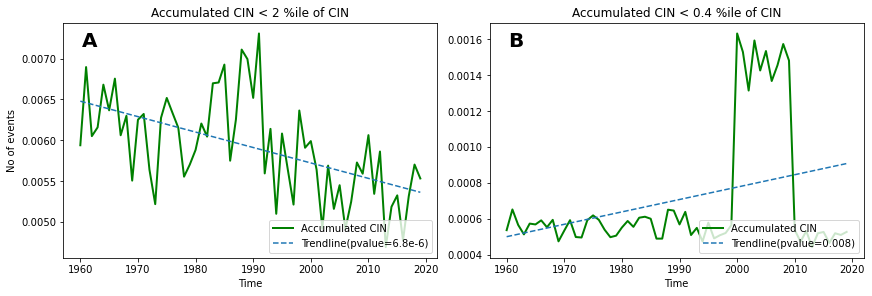

In [76]:
# plotting
import string

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4), constrained_layout=True)

axes[0].set_xlabel("Time")
axes[0].set_ylabel("No of events")
axes[0].plot(x, array1, color ="green",linewidth =2)
z=np.polyfit(x, array1,  1)
axes[0].plot(x,x*z[0]+z[1],'--')
axes[0].legend(['Accumulated CIN','Trendline(pvalue=6.8e-6)', 'mean'],loc='lower right')
axes[0].text(.05, 0.9, string.ascii_uppercase[0], transform=axes[0].transAxes, 
            size=20, weight='bold')
axes[0].set_title("Accumulated CIN < 2 %ile of CIN")

#plt.plot(x,x*0+array.mean(),'--', color='green', linewidth=1)

axes[1].set_xlabel("Time")
#axes[1].set_ylabel("No of events")
axes[1].plot(x, array2, color ="green",linewidth =2)
z=np.polyfit(x, array2,  1)
axes[1].plot(x,x*z[0]+z[1],'--')
axes[1].legend(['Accumulated CIN','Trendline(pvalue=0.008)', 'mean'],loc='lower right')
axes[1].text(.05, 0.9, string.ascii_uppercase[1], transform=axes[1].transAxes, 
            size=20, weight='bold')
axes[1].set_title("Accumulated CIN < 0.4 %ile of CIN")


#plt.savefig("Fig5.pdf", dpi=300)